In [50]:
%reload_ext autoreload
%autoreload 2

from common_imports import *

In [6]:
kets = [qt.basis(2,i) for i in range(2)]
e_ops = [qt.ket2dm(ket) for ket in kets]

pulse_duration = 10
binwidth = 2*np.pi/omega0*100
endTime = 3*pulse_duration
N_time = int(endTime/binwidth)
tlist = np.linspace(0,endTime,N_time)
tcentre = endTime/2
tlist_centre = np.full(tlist.size,tcentre)

N_params = 1

chirp_max = 2*np.pi*(40e-3)
chirps = np.linspace(0,chirp_max,N_params)
rabi0 = 2*np.pi*(100e-3)
data = []
expect_g = []
expect_e = []
opts = qt.Options(store_states=True)
for i in range(N_params):
        chirp = chirps[i]
        envelope = rabi0*np.exp(-4*np.log(2)*(tlist-tlist_centre)**2/pulse_duration**2)
        detuning = chirp*(tlist-tlist_centre)
        H = []
        H.append([qt.Qobj([[0,0],[0,1]]),detuning])
        H.append([-hbar*qt.sigmax(),envelope])

        #result = qt.sesolve(tlist = tlist, psi0 = kets[0], H=H,e_ops=e_ops)
        result = qt.mesolve(tlist = tlist, rho0 = qt.ket2dm(kets[0]), H=H,e_ops=e_ops,options=opts)
        print(qt.ket2dm(kets[0]))
        expect_g.append(result.expect[0])
        expect_e.append(result.expect[1])
print(result.states[-1])




Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.84669524+0.j         0.        -0.36028528j]
 [0.        +0.36028528j 0.15330476+0.j        ]]


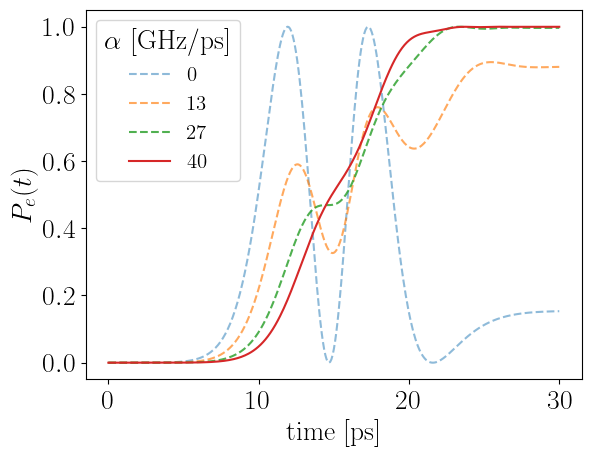

In [26]:
fig,ax= plt.subplots()
alphas = np.linspace(0.5,1,N_params)
ls = "dashed"
for i in range(N_params):
    if i == N_params-1:
        ls = "solid"
    ax.plot(tlist,expect_e[i],alpha = alphas[i],ls=ls,label="{:.0f}".format(chirps[i]*1e3/(2*np.pi)))
ax.set_xlabel("time [ps]")
ax.set_ylabel(r"$P_e(t)$")
ax.legend(title=r"$\alpha$ [GHz/ps]",fontsize=15)
plt.savefig("figures/thesis_draft/chirp_time_evolution.svg",bbox_inches="tight")
plt.show()

In [101]:
Q = qt.Qobj([[2,1],[1,3]])**2
print(Q)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 5.  5.]
 [ 5. 10.]]


# Re-doing figures for Doppler studies

4.771275352895774e-06


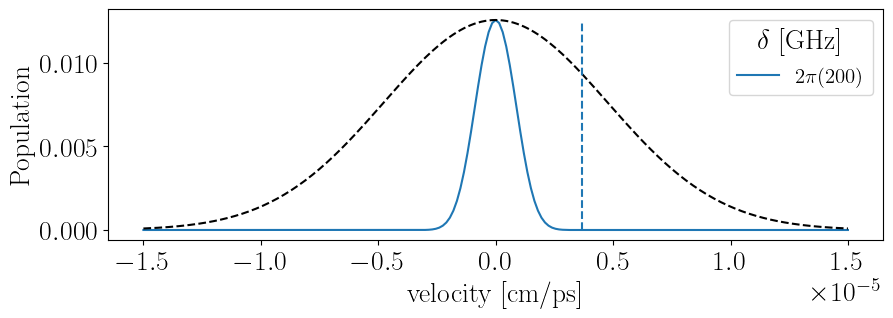

In [117]:
# DETUNINGS

system = Ps_system(N_points = 100)
fig,ax = plt.subplots(figsize=(10,3))
#detunings_ls = [200,0,-152,-250]
detunings_ls = [0]
detunings_labels = [r"$2\pi$(200)",r"0",r"-$2\pi$(152)",r"-$2\pi$(250)"]
detunings = 2*np.pi*1e-3*np.asarray(detunings_ls)
i=0

for detuning in detunings:
    
    rabi0 = 2*np.pi*(118e-3)
    chirp = 0#2*np.pi*(150e-3)
    direction = 1
    pulse_duration = 10

    laser_guess = { "label":"laser",
                    "scale":1000,
                    "order":0,
                    "rabi0" :rabi0,
                    "detuning0": detuning,
                    "chirp" : chirp,
                    "pulse_duration" : pulse_duration,
                    "unit_wavevector":direction,
                    "start":0,
                    "end":int(3*pulse_duration)
                    }
    laser = laser_new(laser_guess)
    system.init_distribution_MB()
    system.create_composite(laser)
    system.init_states_ground()

    #print(system.states)
    #system.set_Hamiltonian_MT_general_laser(laser)
    system.set_Hamiltonian_noMT_general_laser(laser)
    #result = qt.sesolve(system.H,tlist=laser.tlist,psi0 = system.states,e_ops = system.e_ops)
    result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = system.states,e_ops = system.e_ops,options=opts)
    system.organise_result(result)
    #print(result.states[-1])
    ax.plot(system.velocity_bins,system.expect["2P"][-1],label=detunings_labels[i])
    i+=1
ax.plot(system.velocity_bins,system.expect["1S"][0],ls="dashed",color="black")
plt.legend(title=r"$\delta$ [GHz]",fontsize=15)
plt.xlabel("velocity [cm/ps]")
plt.ylabel("Population")
plt.vlines(3.6927e-6,0,0.0125,ls="dashed")
#plt.savefig("figures/thesis_draft/DOPPLER_DETUNINGS_broad.svg",bbox_inches="tight")
plt.show()

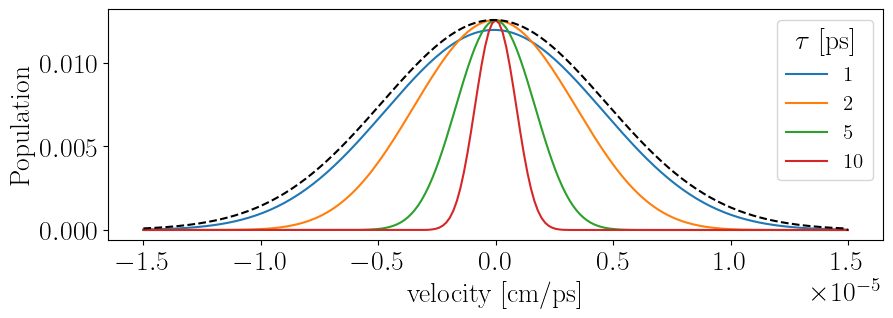

In [119]:
# PULSE DURATIONS

system = Ps_system(N_points = 100)
fig,ax = plt.subplots(figsize=(10,3))
durations_ls = [1,2,5,10]
durations = np.asarray(durations_ls)
i=0
for pulse_duration in durations:
    ratio = 10/pulse_duration
    rabi0 = 2*np.pi*(118e-3)*ratio
    chirp = 0#2*np.pi*(150e-3)
    direction = 1
    detuning0 = 0

    laser_guess = { "label":"laser",
                    "scale":1000,
                    "order":0,
                    "rabi0" :rabi0,
                    "detuning0": detuning0,
                    "chirp" : chirp,
                    "pulse_duration" : pulse_duration,
                    "unit_wavevector":direction,
                    "start":0,
                    "end":int(3*pulse_duration)
                    }
    laser = laser_new(laser_guess)
    system.init_distribution_MB()
    system.create_composite(laser)
    system.init_states_ground()


    #system.set_Hamiltonian_MT_general_laser(laser)
    system.set_Hamiltonian_noCMT_general_laser(laser)
    result = qt.sesolve(system.H,tlist=laser.tlist,psi0 = system.states,e_ops = system.e_ops)
    system.organise_result(result)
    
    ax.plot(system.velocity_bins,system.expect["2P"][-1],label=durations_ls[i])
    i+=1
ax.plot(system.velocity_bins,system.expect["1S"][0],ls="dashed",color="black")
plt.legend(title=r"$\tau$ [ps]",fontsize=15)
plt.xlabel("velocity [cm/ps]")
plt.ylabel("Population")
#plt.savefig("figures/thesis_draft/DOPPLER_DURATIONS_broad.svg",bbox_inches="tight")
plt.show()

31.52644657548917
31.52644657548917
31.52644657548917


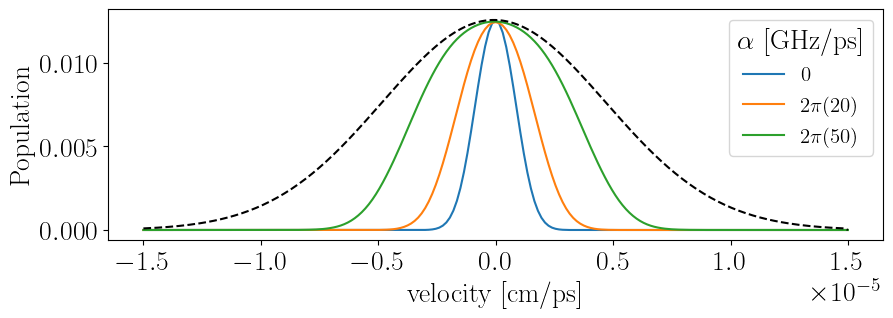

In [13]:
# CHIRP RATES

system = Ps_system(N_points = 100)
fig,ax = plt.subplots(figsize=(10,3))
chirps_ls = [0,20,50]
chirps = 2*np.pi*1e-3*np.asarray(chirps_ls)
labels = [r"$0$",r"$2\pi(20)$",r"$2\pi(50)$"]
i=0
for chirp in chirps:
    rabi0 = 2*np.pi*(118e-3)
    direction = 1
    detuning0 = 0
    pulse_duration = 10

    laser_guess = { "label":"laser",
                    "scale":1000,
                    "order":0,
                    "rabi0" :rabi0,
                    "detuning0": detuning0,
                    "chirp" : chirp,
                    "pulse_duration" : pulse_duration,
                    "unit_wavevector":direction,
                    "start":0,
                    "end":int(3*pulse_duration)
                    }
    laser = laser_new(laser_guess)
    system.init_distribution_MB()
    system.create_composite(laser)
    system.init_states_ground()

    handler = data_handler()
    print(handler.expect_standard_deviation(system.states,N_bins=system.N_points))

    #system.set_Hamiltonian_MT_general_laser(laser)
    system.set_Hamiltonian_noMT_general_laser(laser)
    result = qt.sesolve(system.H,tlist=laser.tlist,psi0 = system.states,e_ops = system.e_ops)
    system.organise_result(result)
    
    ax.plot(system.velocity_bins,system.expect["2P"][-1],label=labels[i])
    i+=1
ax.plot(system.velocity_bins,system.expect["1S"][0],ls="dashed",color="black")
plt.legend(title=r"$\alpha$ [GHz/ps]",fontsize=15)
plt.xlabel("velocity [cm/ps]")
plt.ylabel("Population")
#plt.savefig("figures/thesis_draft/DOPPLER_CHIRPS_broad.svg",bbox_inches="tight")
plt.show()

In [40]:
system = Ps_system(N_points=100)
system.init_distribution_MB()
system.create_composite()
system.init_states_ground()

handler = data_handler()
print(handler.expect_standard_deviation(system.states,N_bins=system.N_points))


31.52644691062401
